In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
df = pd.read_csv('train.csv')
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [4]:
# 変数間の相関の強さを可視化するグラフ作成のためオブジェクト型の変数を除外する
# 参考：https://amalog.hateblo.jp/entry/kaggle-pandas-tips
df_numetric = df.select_dtypes(exclude=['object'])
df_numetric.head()

,y,soldout,kcal,payday,temperature
0,90,0,NaN,NaN,19.8
1,101,1,NaN,NaN,17.0
2,118,0,NaN,NaN,15.5
3,120,1,NaN,NaN,15.2
4,130,1,NaN,NaN,16.1


In [5]:
# カラムの欠損値を確認
df_numetric.isnull().sum()

y                0
soldout          0
kcal            41
payday         197
temperature      0
dtype: int64

In [6]:
# 欠損値を埋める
df_numetric = df_numetric.fillna(-99)
df_numetric.isnull().sum()

y              0
soldout        0
kcal           0
payday         0
temperature    0
dtype: int64

## 各変数の相関係数をヒートマップで描画

In [7]:
def set_seaborn():
        graph_params = {
        'axes.labelsize':15,
        'axes.titlesize':15,
        'xtick.labelsize':15,
        'figure.figsize' : [16, 8],
        'ytick.labelsize' : 15,
        'legend.fontsize' : 15,
        }

        plt.rcParams.update(**graph_params)

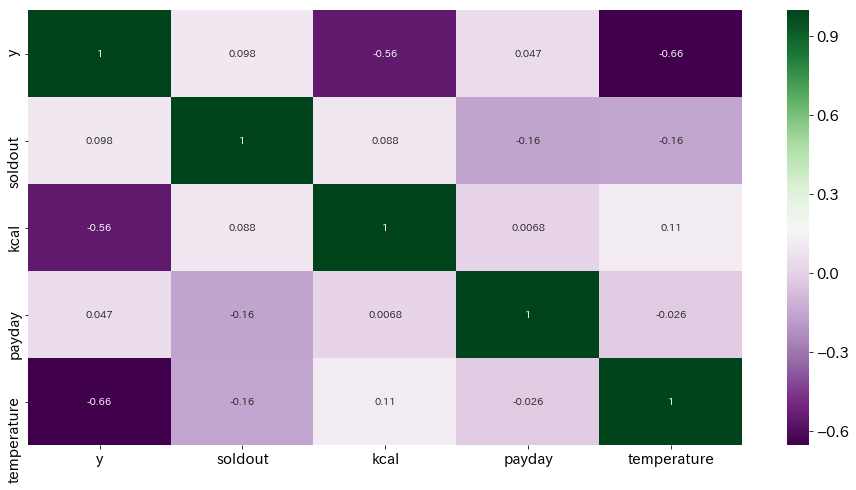

In [8]:
# 参考URL（ヒートマップ）：https://pythondatascience.plavox.info/seaborn/heatmap
# https://note.nkmk.me/python-seaborn-heatmap/
set_seaborn()
sns.heatmap(df_numetric.corr(), annot=True, cmap = 'PRGn')